In [1]:
import os

measuring_root = "/Users/jesse/Thesis/Code"
execfile(os.path.join(measuring_root, "analysis/scripts/setup_analysis.py"))
import analysis.lib.purification.purify_delayfb as purify_delayfb;reload(purify_delayfb)
%matplotlib inline


Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
reloaded
Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
Loading config for Jesse's MacBook
Setting up analysis environment for Jesse's MacBook
reloaded
Loading config for Jesse's MacBook
reloaded
Loading config for Jesse's MacBook


reloaded
Loading config for Jesse's MacBook


/Users/jesse/Thesis/Code/analysis/lib/math/error.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uncertainties == None:
/Users/jesse/Thesis/Code/analysis/lib/fitting/common.py:787: RuntimeWarning: invalid value encountered in power
  return a() + A() * np.exp(-((x-x0())/T())**n())*np.cos(2*np.pi*( f()*x + phi()/360.))
/Users/jesse/Thesis/Code/analysis/lib/fitting/fit.py:99: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not success or cov == None: # FIXME: find a better solution!!!
/Users/jesse/Thesis/Code/analysis/lib/tools/plot.py:40: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if fit_xvals == None:


Converged with chi squared  0.0404681983625
degrees of freedom, dof  17
RMS of residuals (i.e. sqrt(chisq/dof))  0.0487901860687
Reduced chisq (i.e. variance of residuals)  0.00238048225662

fitted parameters at minimum, with 68% C.I.:
 0 A              0.898484 +/-   0.043687
 1 T            137.307375 +/-   8.584753
 2 n              1.445002 +/-   0.171167

correlation matrix:
               A         T         n         
         A  1.000000
         T -0.713572  1.000000
         n -0.614205  0.519761  1.000000



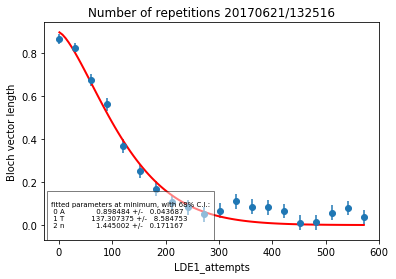

In [2]:
reload(pu_ssro)
bl_x, bl_y, bl_y_u = pu_ssro.number_of_repetitions(contains = '_X',older_than="20170621132600",do_fit = True,fixed=[0,2,5,6], ret_data=True)

# Old feedback

In [1]:
reload(purify_delayfb)

data_older_thans = ["20170621164100", "20170621164600", "20170621170900"]

# for ot in data_older_thans:
#     pu_ssro.number_of_repetitions(contains = 'ADwin_phase_compensation',
#                                   older_than=ot,
#                                   do_fit = True,
#                                   fixed=[0,2,5,6],
#                                   x_only=True)

oldfb_x, oldfb_y, oldfb_y_u = purify_delayfb.number_of_repetitions_stitched(contains='ADwin_phase_compensation', 
                                       older_thans=data_older_thans, 
                                       do_fit=True, 
                                       x_only=True,
                                       fixed=[0,2,5,6],
                                       ret_data=True)

NameError: name 'pu_ssro' is not defined

# New feedback

reloaded
Loading config for Jesse's MacBook


/Users/jesse/Thesis/Code/analysis/lib/math/error.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uncertainties == None:
/Users/jesse/Thesis/Code/analysis/lib/fitting/fit.py:99: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if not success or cov == None: # FIXME: find a better solution!!!
/Users/jesse/Thesis/Code/analysis/lib/tools/plot.py:41: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if fit_xvals == None:


Converged with chi squared  0.272168229
degrees of freedom, dof  28
RMS of residuals (i.e. sqrt(chisq/dof))  0.0985915508188
Reduced chisq (i.e. variance of residuals)  0.00972029389286

fitted parameters at minimum, with 68% C.I.:
 0 A              0.994605 +/-   0.054748
 1 T            128.229532 +/-  11.085239

correlation matrix:
               A         T         
         A  1.000000
         T -0.715726  1.000000



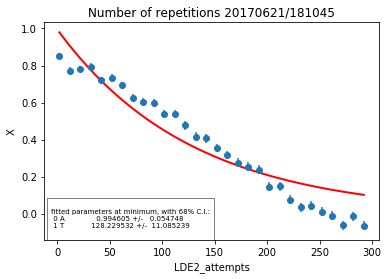

In [2]:
reload(purify_delayfb)

data_older_thans = ["20170621180000", "20170621180700", "20170621181100"]

# for ot in data_older_thans:
#     pu_ssro.number_of_repetitions(contains = 'ADwin_phase_compensation',
#                                   older_than=ot,
#                                   do_fit = True,
#                                   fixed=[0,2,5,6],
#                                   x_only=True)

newfb_x, newfb_y, newfb_y_u = purify_delayfb.number_of_repetitions_stitched(contains='phase_fb_delayline', 
                                                                            older_thans=data_older_thans, 
                                                                            do_fit=True, 
                                                                            x_only=True,
                                                                            fit_n=1.0,
                                                                            fixed=[0,2,5,6,4],
                                                                            ret_data=True)

# Combined plot

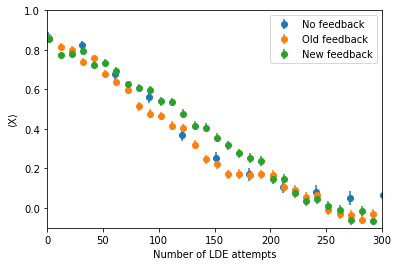

In [5]:
fig = plt.figure()
ax = plt.subplot(111)
plt.xlabel("Number of LDE attempts")
plt.ylabel(r"$\langle$X$\rangle$")

plt.errorbar(bl_x, bl_y, bl_y_u, fmt='o', label='No feedback')
plt.errorbar(oldfb_x, oldfb_y, oldfb_y_u, fmt='o', label='Old feedback')
plt.errorbar(newfb_x, newfb_y, newfb_y_u, fmt='o', label='New feedback')
plt.legend()
plt.xlim(0,300)
plt.ylim(-0.1,1)

plt.savefig("feedback_comparison.png", dpi=300)

# Multi-carbon measurements

reloaded
Loading config for Jesse's MacBook


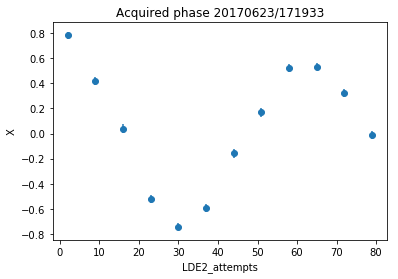

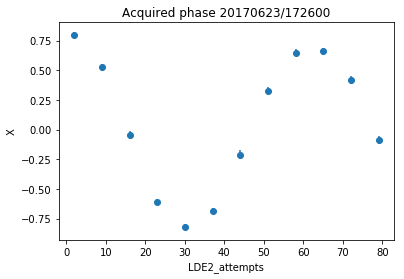

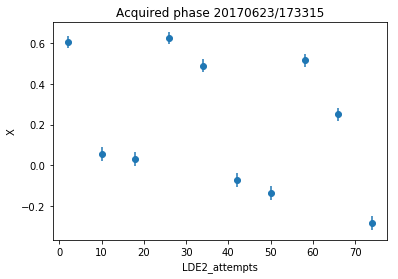

Converged with chi squared  0.0195391387529
degrees of freedom, dof  8
RMS of residuals (i.e. sqrt(chisq/dof))  0.0494205660035
Reduced chisq (i.e. variance of residuals)  0.00244239234411

fitted parameters at minimum, with 68% C.I.:
 0 f              0.015783 +/-   0.000217
 1 A              0.823809 +/-   0.044256
 2 phi            1.781948 +/-   3.409453
 3 t            169.615362 +/-  39.635148

correlation matrix:
               f         A         phi       t         
         f  1.000000
         A -0.304617  1.000000
       phi -0.854765  0.325630  1.000000
         t  0.306784 -0.819370 -0.296398  1.000000

This is the phase detuning 6.0
Acquired phase per repetition (compensating for phase_detuning=) -0.318 +/- 0.078
phase offset  1.782


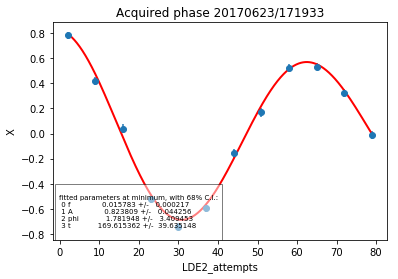

Converged with chi squared  0.0092392127806
degrees of freedom, dof  8
RMS of residuals (i.e. sqrt(chisq/dof))  0.0339838431843
Reduced chisq (i.e. variance of residuals)  0.00115490159758

fitted parameters at minimum, with 68% C.I.:
 0 f              0.015970 +/-   0.000120
 1 A              0.874264 +/-   0.028991
 2 phi            1.798027 +/-   2.028566
 3 t            353.049158 +/-  99.702287

correlation matrix:
               f         A         phi       t         
         f  1.000000
         A -0.272517  1.000000
       phi -0.866188  0.288247  1.000000
         t  0.273960 -0.838938 -0.264421  1.000000

This is the phase detuning 6.0
Acquired phase per repetition (compensating for phase_detuning=) -0.251 +/- 0.043
phase offset  1.798


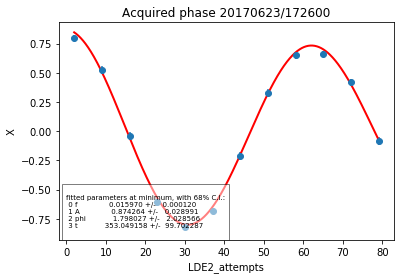

Converged with chi squared  0.530473120908
degrees of freedom, dof  6
RMS of residuals (i.e. sqrt(chisq/dof))  0.297341868592
Reduced chisq (i.e. variance of residuals)  0.088412186818

fitted parameters at minimum, with 68% C.I.:
 0 f              0.033357 +/-   0.002658
 1 A              0.439578 +/-   0.242897
 2 phi           -5.635873 +/-  39.814265
 3 t            463.133620 +/- 2741.133331

correlation matrix:
               f         A         phi       t         
         f  1.000000
         A -0.069467  1.000000
       phi -0.868669  0.096697  1.000000
         t  0.016281 -0.820905 -0.054774  1.000000

This is the phase detuning 6.0
Acquired phase per repetition (compensating for phase_detuning=) 6.008 +/- 0.957
phase offset  -5.636


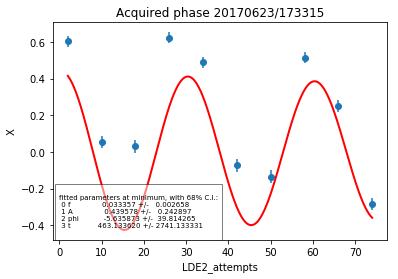

In [7]:
XI_ot = "20170623172000"
IX_ot = "20170623172700"
XX_ot = "20170623173400"

reload(pu_ssro)
XI_data = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=XI_ot, ret_data=True)
IX_data = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=IX_ot, ret_data=True)
XX_data = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=XX_ot, ret_data=True)

XI_fit = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=XI_ot, ret=True, do_fit=True, freq=6./360.)
IX_fit = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=IX_ot, ret=True, do_fit=True, freq=6./360.)
XX_fit = pu_ssro.calibrate_LDE_phase(contains="phase_fb_delayline", older_than=XX_ot, ret=True, do_fit=True, freq=12./260.)

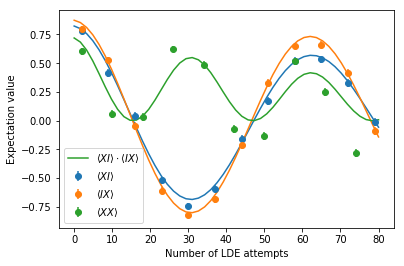

In [8]:
fig = plt.figure()
ax = plt.subplot(111)
plt.xlabel("Number of LDE attempts")
plt.ylabel(r"Expectation value")

XI_ebar, _, _ = plt.errorbar(XI_data[0], XI_data[1], XI_data[2], fmt='o', label=r"$\langle XI \rangle$")
IX_ebar, _, _ = plt.errorbar(IX_data[0], IX_data[1], IX_data[2], fmt='o', label=r"$\langle IX \rangle$")
XX_ebar, _, _ = plt.errorbar(XX_data[0], XX_data[1], XX_data[2], fmt='o', label=r"$\langle XX \rangle$")

xvals = np.linspace(0,80)
XI_fitfunc = XI_fit['fitfunc']
plt.plot(xvals, XI_fitfunc(xvals), color=XI_ebar.get_color())

IX_fitfunc = IX_fit['fitfunc']
plt.plot(xvals, IX_fitfunc(xvals), color=IX_ebar.get_color())

plt.plot(xvals, XI_fitfunc(xvals)*IX_fitfunc(xvals), color=XX_ebar.get_color(), label=r"$\langle XI \rangle \cdot \langle IX \rangle$")

plt.legend()

plt.savefig("IX_XI_XX_detuned_unclean_msmt.png", dpi=300)

# Multi-carbon state preservation

Converged with chi squared  0.0269764929708
degrees of freedom, dof  29
RMS of residuals (i.e. sqrt(chisq/dof))  0.0304995720551
Reduced chisq (i.e. variance of residuals)  0.000930223895546

fitted parameters at minimum, with 68% C.I.:
 0 A              0.765123 +/-   0.033897
 1 T            297.065095 +/-  28.326661
 2 n              0.774867 +/-   0.125913
 3 f              0.001322 +/-   0.000019

correlation matrix:
               A         T         n         f         
         A  1.000000
         T -0.176150  1.000000
         n -0.845065 -0.265048  1.000000
         f -0.284291 -0.363761  0.482241  1.000000



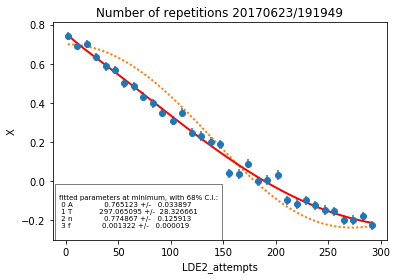

In [35]:
data_older_thans = ["20170623185500", "20170623191000", "20170623192000"]

newfb_x, newfb_y, newfb_y_u = pu_ssro.number_of_repetitions_stitched(contains='phase_fb_delayline', 
                                       older_thans=data_older_thans, 
                                       do_fit=True, 
                                       x_only=True,
                                       fixed=[0,2,6],
                                                                     fit_A=0.7, 
                                                                     fit_T=300,
                                                                     fit_n=3,
                                                                     fit_f=0.5/360.0,
                                                                     
                                        ret_data=True,
                                                                    show_guess=True)

In [33]:
0.001322*360.0

0.47592